# Deforestación en el tiempo 2011-2021

In [54]:
import os, geopandas as gpd

Peru=gpd.read_file(os.path.join("data","PER_shp","gadm41_PER_1.shp"))

# Mapa del Perú

In [56]:
Peru.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PER.1_1,PER,Peru,Amazonas,NA,NA,Región,Region,01,PE.AM,PE-AMA,"POLYGON ((-77.78027 -6.94195, -77.78199 -6.946..."
1,PER.2_1,PER,Peru,Ancash,Ancachs,NA,Región,Region,02,PE.AN,PE-ANC,"MULTIPOLYGON (((-77.28622 -10.55822, -77.28796..."
2,PER.3_1,PER,Peru,Apurímac,Apuromac,NA,Región,Region,03,PE.AP,NA,"POLYGON ((-73.24030 -13.47629, -73.23711 -13.4..."
3,PER.4_1,PER,Peru,Arequipa,NA,NA,Región,Region,04,PE.AR,PE-ARE,"MULTIPOLYGON (((-71.84236 -17.17264, -71.84236..."
4,PER.5_1,PER,Peru,Ayacucho,NA,NA,Región,Region,05,PE.AY,PE-AYA,"POLYGON ((-73.29331 -15.39209, -73.29623 -15.3..."


<Axes: >

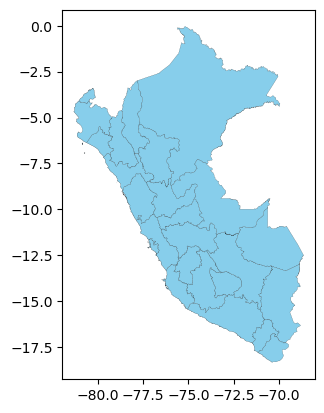

In [58]:
Peru.plot(facecolor="skyblue",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1)

# Convertir nombres

In [116]:
Peru['NAME_1'] = Peru['NAME_1'].str.upper()

defo_data['Departamento'] = defo_data['Departamento'].str.upper()

In [60]:
import pandas as pd

excel_path = os.path.join("data", "defo.xlsx")

defo_data = pd.read_excel(excel_path)
defo_data.head()

,Departamento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Amazonas,3595,3181,4746,6682,5199,6931,6984,8455,7453,5805,11540.79,4329.27
1,Ayacucho,603,564,897,803,773,813,980,2781,1744,2166,2710.71,893.34
2,Cajamarca,1131,974,702,828,1147,1074,1890,2222,1276,600,1602.90,383.76
3,Cusco,3610,3328,4190,3501,5087,4808,5700,12181,9643,7103,8858.34,5349.24
4,Huancavelica,131,40,12,28,76,73,239,19,18,92,171.27,21.96


# Verificar las diferencias entre los nombres de departamentos

In [64]:
onlyInShapefile = set(Peru['NAME_1']) - set(defo_data['Departamento'])
onlyInExcel = set(defo_data['Departamento']) - set(Peru['NAME_1'])

print("Nombres solo en el shapefile:", onlyInShapefile)
print("Nombres solo en el Excel:", onlyInExcel)

Nombres solo en el shapefile: {'CALLAO', 'TACNA', 'ICA', 'LIMA PROVINCE', 'TUMBES', 'APURÍMAC', 'AREQUIPA', 'ANCASH', 'LIMA', 'MOQUEGUA', 'LAMBAYEQUE'}
Nombres solo en el Excel: set()


In [66]:
onlyInShapefile

{'ANCASH',
 'APURÍMAC',
 'AREQUIPA',
 'CALLAO',
 'ICA',
 'LAMBAYEQUE',
 'LIMA',
 'LIMA PROVINCE',
 'MOQUEGUA',
 'TACNA',
 'TUMBES'}

In [68]:
onlyInExcel

set()

# Merge

In [82]:
merged_data = Peru.merge(defo_data, left_on='NAME_1', right_on='Departamento')
merged_data.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,PER.1_1,PER,Peru,AMAZONAS,NA,NA,Región,Region,01,PE.AM,...,4746,6682,5199,6931,6984,8455,7453,5805,11540.79,4329.27
1,PER.5_1,PER,Peru,AYACUCHO,NA,NA,Región,Region,05,PE.AY,...,897,803,773,813,980,2781,1744,2166,2710.71,893.34
2,PER.6_1,PER,Peru,CAJAMARCA,Caxamarca,NA,Región,Region,06,PE.CJ,...,702,828,1147,1074,1890,2222,1276,600,1602.90,383.76
3,PER.8_1,PER,Peru,CUSCO,Cuzco|Qosqo,NA,Región,Region,08,PE.CS,...,4190,3501,5087,4808,5700,12181,9643,7103,8858.34,5349.24
4,PER.9_1,PER,Peru,HUANCAVELICA,NA,NA,Región,Region,09,PE.HV,...,12,28,76,73,239,19,18,92,171.27,21.96


In [79]:
from thefuzz import process

[(dept_shp, process.extractOne(dept_shp, onlyInExcel)) for dept_shp in sorted(onlyInShapefile)]


[('ANCASH', None),
 ('APURÍMAC', None),
 ('AREQUIPA', None),
 ('CALLAO', None),
 ('ICA', None),
 ('LAMBAYEQUE', None),
 ('LIMA', None),
 ('LIMA PROVINCE', None),
 ('MOQUEGUA', None),
 ('TACNA', None),
 ('TUMBES', None)]

In [92]:
print(merged_data.columns)


Index([       'GID_1',        'GID_0',      'COUNTRY',       'NAME_1',
          'VARNAME_1',    'NL_NAME_1',       'TYPE_1',    'ENGTYPE_1',
               'CC_1',       'HASC_1',        'ISO_1',     'geometry',
       'Departamento',           2010,           2011,           2012,
                 2013,           2014,           2015,           2016,
                 2017,           2018,           2019,           2020,
                 2021],
      dtype='object')


# Variación entre provincias 

In [118]:
merged_data['cambio_2013_2021'] = merged_data[2013] - merged_data[2021]

merged_data['estado'] = merged_data['cambio_2013_2021'].apply(lambda x: 'Mejoró' if x < 0 else 'Empeoró')


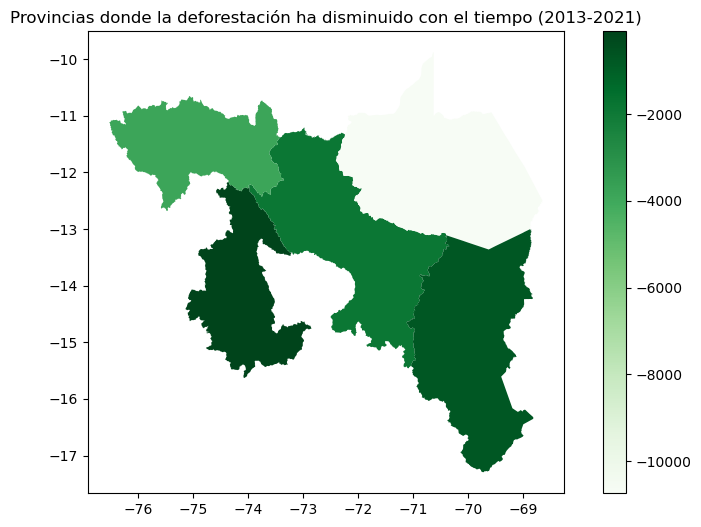

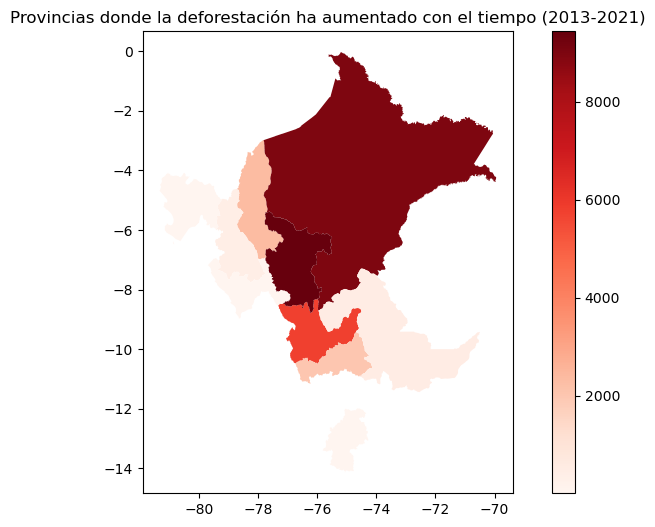

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data[merged_data['estado'] == 'Mejoró'].plot(column='cambio_2013_2021', ax=ax, legend=True, cmap='Greens')
plt.title('Provincias donde la deforestación ha disminuido con el tiempo (2013-2021)')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data[merged_data['estado'] == 'Empeoró'].plot(column='cambio_2013_2021', ax=ax, legend=True, cmap='Reds')
plt.title('Provincias donde la deforestación ha aumentado con el tiempo (2013-2021)')
plt.show()
